# **Project 2**, APS1070 Winter 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Feb 28, 11 PM - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Yunjie Xu 
*   Student Number: 1008601951

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____ **[0.1]**
* What features in the dataset are present aside from the 28 main features?  _____ **[0.1]**
* Which column contains the targets? **[0.1]**
* What is the meaning of target values?_____ **[0.1]**

In [1]:
pip install wget

In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
### YOUR CODE HERE ###

# How many rows are there? _ [0.1]
print(f'There are {np.shape(df)[0]} rows in the data frame.')

# What features in the dataset are present aside from the 28 main features? _ [0.1]
print(f'{df.columns[0]} and {df.columns[-2]} are features in the dataset are present aside from the 28 main features.')

# Which column contains the targets? [0.1]
print(f'{df.columns[-1]} column contains the targets, which is the last column.')

# What is the meaning of target values?_ [0.1]
print('1 corresponds to fraudulent, 0 coresponds to non-fraudulent.')


There are 284807 rows in the data frame.
Time and Amount are features in the dataset are present aside from the 28 main features.
Class column contains the targets, which is the last column.
1 corresponds to fraudulent, 0 coresponds to non-fraudulent.


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**
* What metrics should we use to evaluate a model in such cases _________ **[0.2]**


In [6]:
### YOUR CODE HERE ###

### YOUR CODE HERE ###

# What is the percentage of entries in the dataset for each class? _ [0.1]
print('The class 0 has percentage '+ str(df['Class'].value_counts()[0]/df.shape[0]*100) + '% , '
      'And the class 1 has percentage '+ str(df['Class'].value_counts()[1]/df.shape[0]*100) + '% .')

# Is this data considered balanced or unbalanced? Why is this the case?_ [0.1]
print('This data is unbalanced. Because the size of class 0 is much larger than class 1.')

The class 0 has percentage 99.82725143693798% , And the class 1 has percentage 0.1727485630620034% .
This data is unbalanced. Because the size of class 0 is much larger than class 1.


In [7]:
# Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _ [0.5]
'''
The imbalance is important. 

Because in the KNN classifier, we need to find the nearest neighbor, but if the data is balanced, 
you can easily detect the class. But if the data is imbalanced, the detection performance will be 
decreased. And this will mainly happen in seeing minority classes. However, detecting the minority
class is very important in real problems. Thus we cannot use KNN to classify imbalanced data like
project 2; if we do that, it will probably misclassify all fraudulent data into non-fraudulent.

'''

'\nThe imbalance is important. \n\nBecause in the KNN classifier, we need to find the nearest neighbor, but if the data is balanced, \nyou can easily detect the class. But if the data is imbalanced, the detection performance will be \ndecreased. And this will mainly happen in seeing minority classes. However, detecting the minority\nclass is very important in real problems. Thus we cannot use KNN to classify imbalanced data like\nproject 2; if we do that, it will probably misclassify all fraudulent data into non-fraudulent.\n\n'

In [8]:
# What metrics should we use to evaluate a model in such cases _ [0.2]
'''
I think we should use F-1 Score to evaluate the model.
The higher the F-1 Score, the better the model. The F-1 score balances precision and recall on the positive class.
for inbalance dataset, even we missclassify large proportion of minority class, the percision rate will still possible to
be very high. The recall reate is TP/(TP+FN). If we can control the number of FN to be very small, thus we can promise the 
accuracy of classifying minority calss. That is why I think we need F-1 Score.
'''

'\nI think we should use F-1 Score to evaluate the model.\nThe higher the F-1 Score, the better the model. The F-1 score balances precision and recall on the positive class.\nfor inbalance dataset, even we missclassify large proportion of minority class, the percision rate will still possible to\nbe very high. The recall reate is TP/(TP+FN). If we can control the number of FN to be very small, thus we can promise the \naccuracy of classifying minority calss. That is why I think we need F-1 Score.\n'

Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [9]:
### Split the data  ###
X = df.drop(['Class','Time','Amount'], axis='columns')
y = df['Class']

# training = 65%, validation = 20%, testing = 15%

# Split testing 15%, validation+training = 85%
X_test, X_train, y_test, y_train = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.15,
                                                    random_state=40)

# Split validation = 0.2/0.85, testing = 0.65/0.85
X_val, X_train, y_val, y_train = train_test_split(X_test, 
                                                y_test, 
                                                test_size = 0.65/0.85,
                                                random_state=40)



Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

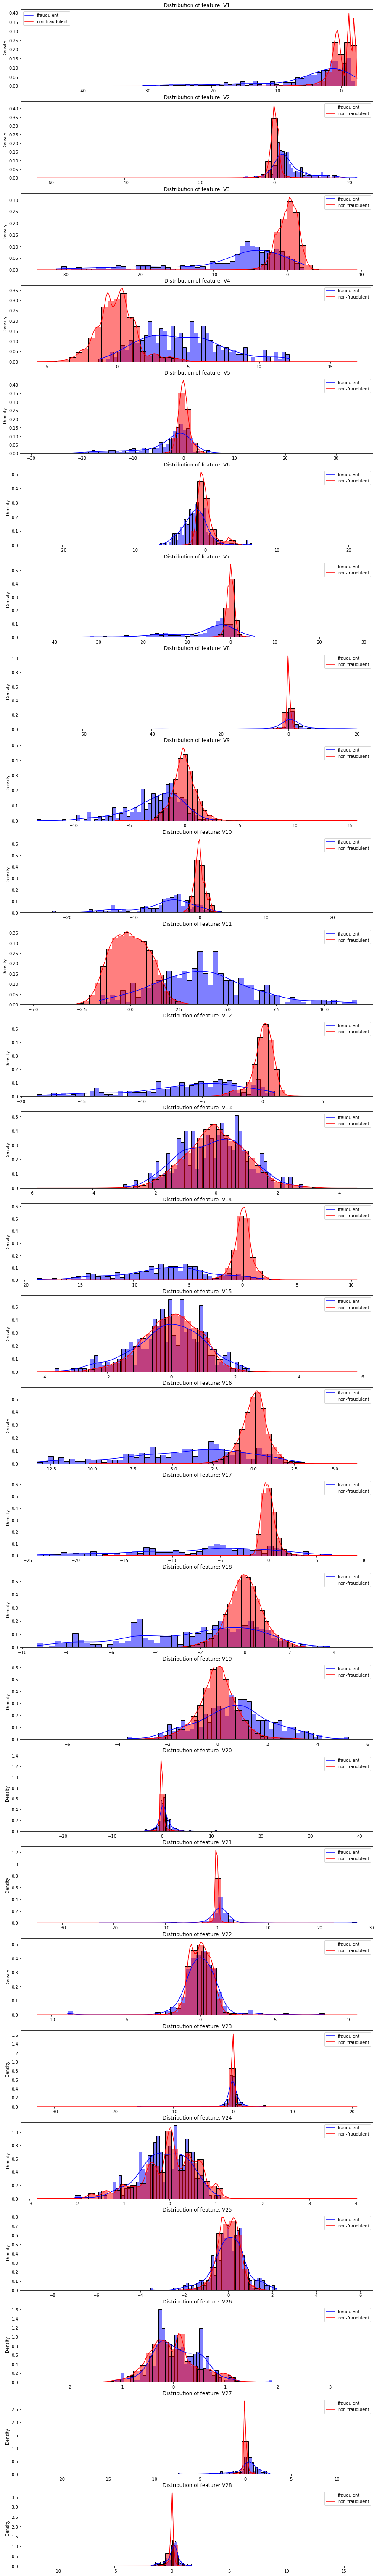

In [10]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

In [11]:
## Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. [0.5]
'''
These diagrams show each features' histogram and density curve based on different classes. We use the blue color to represent the fraudulent data, 
and the red color represents non-fraudulent data. Firstly, most features can be roughly thought of as normal distribution from the diagrams. 
Secondly, we can roughly infer which features can significantly distinguish two classes. Because for some features, the difference  (mean and 
variance) between classes are small, which means we are hard to use these features to distinguish two classes; These features are like V22, V23, V24, 
V25. But some features, the difference between classes are very large. These features may be are good features that we can use in the prediction model 
to distinguish two classes; These features are V14, V17, V10, V12.

'''

"\nThese diagrams show each features' histogram and density curve based on different classes. We use the blue color to represent the fraudulent data, \nand the red color represents non-fraudulent data. Firstly, most features can be roughly thought of as normal distribution from the diagrams. \nSecondly, we can roughly infer which features can significantly distinguish two classes. Because for some features, the difference  (mean and \nvariance) between classes are small, which means we are hard to use these features to distinguish two classes; These features are like V22, V23, V24, \nV25. But some features, the difference between classes are very large. These features may be are good features that we can use in the prediction model \nto distinguish two classes; These features are V14, V17, V10, V12.\n\n"

## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.3]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why?**[0.5]**


In [12]:
### YOUR CODE HERE ###
from sklearn.metrics import roc_curve
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc
from tabulate import tabulate

In [13]:
## Part2_a.1/2

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

# Fit a single Gaussian distribution of training dataset to find AUC of training set
Training_AUC = []
for i in range(0,len(X_train.columns)):
  gm.fit(X_train.iloc[:,i].values.reshape(-1,1))
  p = gm.score_samples(X_train.iloc[:,i].values.reshape(-1,1))
  fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p)
  b = auc(fpr_sc, tpr_sc)
  Training_AUC.append(b)

print(Training_AUC)

# Fit a single Gaussian distribution of training dataset to find AUC of validation set
Validation_AUC = []
for i in range(0,len(X_val.columns)):
  gm.fit(X_train.iloc[:,i].values.reshape(-1,1))
  p = gm.score_samples(X_val.iloc[:,i].values.reshape(-1,1))
  fpr_sc, tpr_sc, _ = roc_curve(y_val, -1 * p)
  b = auc(fpr_sc, tpr_sc)
  Validation_AUC.append(b)

print(Validation_AUC)

[0.7053087076997357, 0.85823846806441, 0.8727756961639863, 0.8968677650392824, 0.7649983868483476, 0.726541960662902, 0.8775465928077694, 0.7839898150026323, 0.8074615887595924, 0.9216493784920047, 0.9048778776180337, 0.9161129954954306, 0.5469105326488695, 0.9546798196135877, 0.5465083868124417, 0.9088493037538348, 0.9360024077504236, 0.8065266199185617, 0.7290080033528337, 0.7400196450668535, 0.8400240060296251, 0.5532538370445936, 0.6868488214013464, 0.48068898424343864, 0.5867984402284201, 0.4974215280823667, 0.8445324020461091, 0.8190859061285822]
[0.6757811232684252, 0.8214564165471673, 0.8488394013087278, 0.8603033207920123, 0.7691405979194634, 0.7248420268241065, 0.849270043204208, 0.7609420095096386, 0.768134685387238, 0.8810065750582187, 0.8630225801835744, 0.8794163419207858, 0.6162961928319468, 0.9343797032088456, 0.45183248201019943, 0.8573356141530579, 0.9034668892389728, 0.7807284848952611, 0.7568833547857429, 0.7031705966866187, 0.7767207148996973, 0.5377571514387571, 0

In [14]:
## Part2_a.3
# Create a table to report AUC finding
table_header = X.columns
row_1 = ['Training Set'] + Training_AUC
row_2 = ['Vlidation Set'] + Validation_AUC
table_data = [row_1,row_2]
print(tabulate(table_data, headers=table_header, tablefmt='grid'))

+---------------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|               |       V1 |       V2 |       V3 |       V4 |       V5 |       V6 |       V7 |       V8 |       V9 |      V10 |      V11 |      V12 |      V13 |     V14 |      V15 |      V16 |      V17 |      V18 |      V19 |      V20 |      V21 |      V22 |      V23 |      V24 |      V25 |      V26 |      V27 |      V28 |
+===============+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+=========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+==========+
| Training Set  | 0.70530

In [15]:
## Part2_a.4

# Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set.
feature_list = []
for i in range(0,3):
  j = Validation_AUC.index(sorted(Validation_AUC)[-3:][i])
  feature = X.columns[j]
  feature_list.append(feature)

print(feature_list)
print(sorted(Validation_AUC)[-3:])

['V10', 'V17', 'V14']
[0.8810065750582187, 0.9034668892389728, 0.9343797032088456]


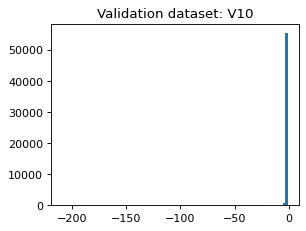

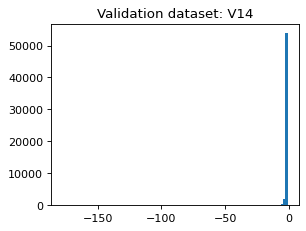

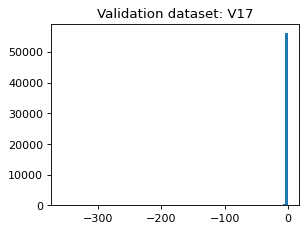

In [16]:
## Part2_a.5

# Ploting the histogram to find the possible range for the best threshold of the validation set like tutorial 2

for i in [9,13,16]:
  # fiting model
  gm.fit(X_train.iloc[:,i].values.reshape(-1,1))
  p = gm.score_samples(X_val.iloc[:,i].values.reshape(-1,1))
  # making plot
  plt.figure(figsize=(4,3),dpi = 80)
  p1 = plt.hist (p , bins = 100)
  plt.title('Validation dataset: V'+ str(i+1))
  plt.show()

In [17]:
# Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately.

for i in [9,13,16]:
  gm.fit(X_train.iloc[:,i].values.reshape(-1,1))
  p = gm.score_samples(X_val.iloc[:,i].values.reshape(-1,1))
  
  f1_list = []
  for tr in np.arange(-100,0,0.1):
    f1 = f1_score(y_val,p < tr)
    f1_list.append(f1)

  tr = -100 + f1_list.index(max(f1_list))/10
  print(f'The feature V{i+1} best threshold is {tr}.')

The feature V10 best threshold is -54.3.
The feature V14 best threshold is -24.599999999999994.
The feature V17 best threshold is -22.200000000000003.


In [18]:
## Part2_a.6

# Calculate Precision, Recall and F1 score on the training set using the threshold you found in previous step.

# V10
gm.fit(X_train.iloc[:,9].values.reshape(-1,1))
p = gm.score_samples(X_train.iloc[:,9].values.reshape(-1,1))
# precision
precision = precision_score(y_train, p < -54.3)
# recall
recall = recall_score(y_train, p < -54.3)
# F-1 Score
f1 = f1_score(y_train,p < -54.3)
# Store in the list
v10_train = [precision,recall,f1]

# V14
gm.fit(X_train.iloc[:,13].values.reshape(-1,1))
p = gm.score_samples(X_train.iloc[:,13].values.reshape(-1,1))
# precision
precision = precision_score(y_train, p < -24.6)
# recall
recall = recall_score(y_train, p < -24.6)
# F-1 Score
f1 = f1_score(y_train,p < -24.6)
# Store in the list
v14_train = [precision,recall,f1]

# V17
gm.fit(X_train.iloc[:,16].values.reshape(-1,1))
p = gm.score_samples(X_train.iloc[:,16].values.reshape(-1,1))
# precision
precision = precision_score(y_train, p < -22.20)
# recall
recall = recall_score(y_train, p < -22.20)
# F-1 Score
f1 = f1_score(y_train,p < -22.20)
# Store in the list
v17_train = [precision,recall,f1]

In [19]:
# Calculate Precision, Recall and F1 score on the validation set using the threshold you found in previous step.

# V10
gm.fit(X_train.iloc[:,9].values.reshape(-1,1))
p = gm.score_samples(X_val.iloc[:,9].values.reshape(-1,1))
# precision
precision = precision_score(y_val, p < -54.3)
# recall
recall = recall_score(y_val, p < -54.3)
# F-1 Score
f1 = f1_score(y_val,p < -54.3)
# Store in the list
v10_val = [precision,recall,f1]

# V14
gm.fit(X_train.iloc[:,13].values.reshape(-1,1))
p = gm.score_samples(X_val.iloc[:,13].values.reshape(-1,1))
# precision
precision = precision_score(y_val, p < -24.6)
# recall
recall = recall_score(y_val, p < -24.6)
# F-1 Score
f1 = f1_score(y_val,p < -24.6)
# Store in the list
v14_val = [precision,recall,f1]

# V17
gm.fit(X_train.iloc[:,16].values.reshape(-1,1))
p = gm.score_samples(X_val.iloc[:,16].values.reshape(-1,1))
# precision
precision = precision_score(y_val, p < -22.20)
# recall
recall = recall_score(y_val, p < -22.20)
# F-1 Score
f1 = f1_score(y_val,p < -22.20)
# Store in the list
v17_val = [precision,recall,f1]

In [20]:
## Create a table
table_header = ['Type','Precision','Recal','F1 score']
row_1 = ['Training dataset V10'] + v10_train
row_2 = ['Training dataset V14'] + v14_train
row_3 = ['Training dataset V17']+ v17_train
row_4 = ['Validation dataset V10'] + v10_val
row_5 = ['Validation dataset V14']+ v14_val
row_6 = ['Validation dataset V17']+ v17_val
table_data = [row_1,row_2,row_3,row_4,row_5,row_6]
print(tabulate(table_data, headers=table_header, tablefmt='grid'))

+------------------------+-------------+----------+------------+
| Type                   |   Precision |    Recal |   F1 score |
+========================+=============+==========+============+
| Training dataset V10   |    0.427419 | 0.165109 |   0.238202 |
+------------------------+-------------+----------+------------+
| Training dataset V14   |    0.668067 | 0.495327 |   0.568873 |
+------------------------+-------------+----------+------------+
| Training dataset V17   |    0.663866 | 0.492212 |   0.565295 |
+------------------------+-------------+----------+------------+
| Validation dataset V10 |    0.428571 | 0.145631 |   0.217391 |
+------------------------+-------------+----------+------------+
| Validation dataset V14 |    0.732394 | 0.504854 |   0.597701 |
+------------------------+-------------+----------+------------+
| Validation dataset V17 |    0.706667 | 0.514563 |   0.595506 |
+------------------------+-------------+----------+------------+


In [21]:
## Part2_a.7

# Report the complexity of your method (Big O notation) for determining the optimal threshold.[0.3]
'''
The complexity of my method is n^2.

There are two for-loop in my algorithem. The first loop choose the feature I want to find. The second loop is to find the best threashold.

Thus in this algorithem is : 3*(100/0.1) = 3000
'''

'\nThe complexity of my method is n^2.\n\nThere are two for-loop in my algorithem. The first loop choose the feature I want to find. The second loop is to find the best threashold.\n\nThus in this algorithem is : 3*(100/0.1) = 3000\n'

In [22]:
## Part2_b.1/2/3

# when only fit a Gaussian only on non-fraudulent transactions in the training set in step 1 (instead of all the transactions).

# Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately.

for i in [9,13,16]:
  gm.fit(X_train.loc[y_train==0].iloc[:,i].values.reshape(-1,1))
  p = gm.score_samples(X_train.iloc[:,i].values.reshape(-1,1))
  
  f1_list = []
  for tr in np.arange(-100,0,0.1):
    f1 = f1_score(y_train,p < tr)
    f1_list.append(f1)

  tr = -100 + f1_list.index(max(f1_list))/10
  print(f'The feature V{i+1} best threshold is {tr}, when only fit a Gaussian only on non-fraudulent transactions.')

The feature V10 best threshold is -62.5, when only fit a Gaussian only on non-fraudulent transactions.
The feature V14 best threshold is -22.0, when only fit a Gaussian only on non-fraudulent transactions.
The feature V17 best threshold is -22.200000000000003, when only fit a Gaussian only on non-fraudulent transactions.


In [23]:
# Calculate Precision, Recall and F1 score on the training set using the threshold you found in previous step.

# V10
gm.fit(X_train.loc[y_train==0].iloc[:,9].values.reshape(-1,1))
p = gm.score_samples(X_train.iloc[:,9].values.reshape(-1,1))
fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p)
# precision
precision = precision_score(y_train, p < -62.5)
# recall
recall = recall_score(y_train, p < -62.5)
# F-1 Score
f1 = f1_score(y_train,p < -62.5)
# AUC 
AUC = auc(fpr_sc, tpr_sc)
# Store in the list
v10_train2 = [precision,recall,f1,AUC]

# V14
gm.fit(X_train.loc[y_train==0].iloc[:,13].values.reshape(-1,1))
p = gm.score_samples(X_train.iloc[:,13].values.reshape(-1,1))
fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p)
# precision
precision = precision_score(y_train, p < -22)
# recall
recall = recall_score(y_train, p < -22)
# F-1 Score
f1 = f1_score(y_train,p < -22)
# AUC 
AUC = auc(fpr_sc, tpr_sc)
# Store in the list
v14_train2 = [precision,recall,f1,AUC]

# V17
gm.fit(X_train.loc[y_train==0].iloc[:,16].values.reshape(-1,1))
p = gm.score_samples(X_train.iloc[:,16].values.reshape(-1,1))
fpr_sc, tpr_sc, _ = roc_curve(y_train, -1 * p)
# precision
precision = precision_score(y_train, p < -22.2)
# recall
recall = recall_score(y_train, p < -22.2)
# F-1 Score
f1 = f1_score(y_train,p < -22.2)
# AUC 
AUC = auc(fpr_sc, tpr_sc)
# Store in the list
v17_train2 = [precision,recall,f1,AUC]

In [24]:
# Calculate Precision, Recall and F1 score on the validation set using the threshold you found in previous step.

# V10
gm.fit(X_train.loc[y_train==0].iloc[:,9].values.reshape(-1,1))
p = gm.score_samples(X_val.iloc[:,9].values.reshape(-1,1))
fpr_sc, tpr_sc, _ = roc_curve(y_val, -1 * p)
# precision
precision = precision_score(y_val, p < -62.5)
# recall
recall = recall_score(y_val, p < -62.5)
# F-1 Score
f1 = f1_score(y_val,p < -62.5)
# AUC 
AUC = auc(fpr_sc, tpr_sc)
# Store in the list
v10_val2 = [precision,recall,f1,AUC]

# V14
gm.fit(X_train.loc[y_train==0].iloc[:,13].values.reshape(-1,1))
p = gm.score_samples(X_val.iloc[:,13].values.reshape(-1,1))
fpr_sc, tpr_sc, _ = roc_curve(y_val, -1 * p)
# precision
precision = precision_score(y_val, p < -22)
# recall
recall = recall_score(y_val, p < -22)
# F-1 Score
f1 = f1_score(y_val,p < -22)
# AUC 
AUC = auc(fpr_sc, tpr_sc)
# Store in the list
v14_val2 = [precision,recall,f1,AUC]

# V17
gm.fit(X_train.loc[y_train==0].iloc[:,16].values.reshape(-1,1))
p = gm.score_samples(X_val.iloc[:,16].values.reshape(-1,1))
fpr_sc, tpr_sc, _ = roc_curve(y_val, -1 * p)
# precision
precision = precision_score(y_val, p < -22.2)
# recall
recall = recall_score(y_val, p < -22.2)
# F-1 Score
f1 = f1_score(y_val,p < -22.2)
# AUC 
AUC = auc(fpr_sc, tpr_sc)
# Store in the list
v17_val2 = [precision,recall,f1,AUC]

In [25]:
## Create a table
table_header = ['Type (only fit non-fraudulent transactions)','Precision','Recal','F1 score','AUC']
row_1 = ['Training dataset V10'] + v10_train2
row_2 = ['Training dataset V14'] + v14_train2
row_3 = ['Training dataset V17']+ v17_train2
row_4 = ['Validation dataset V10'] + v10_val2
row_5 = ['Validation dataset V14']+ v14_val2
row_6 = ['Validation dataset V17']+ v17_val2
table_data = [row_1,row_2,row_3,row_4,row_5,row_6]
print(tabulate(table_data, headers=table_header, tablefmt='grid'))

+-----------------------------------------------+-------------+----------+------------+----------+
| Type (only fit non-fraudulent transactions)   |   Precision |    Recal |   F1 score |      AUC |
+===============================================+=============+==========+============+==========+
| Training dataset V10                          |    0.530612 | 0.161994 |   0.24821  | 0.921844 |
+-----------------------------------------------+-------------+----------+------------+----------+
| Training dataset V14                          |    0.638796 | 0.595016 |   0.616129 | 0.954865 |
+-----------------------------------------------+-------------+----------+------------+----------+
| Training dataset V17                          |    0.598007 | 0.560748 |   0.578778 | 0.935488 |
+-----------------------------------------------+-------------+----------+------------+----------+
| Validation dataset V10                        |    0.481481 | 0.126214 |   0.2      | 0.880863 |
+---------

In [26]:
## Create a table
table_header = ['Type','Precision','Recal','F1 score']
row_1 = ['Training dataset V10'] + v10_train
row_2 = ['Training dataset V14'] + v14_train
row_3 = ['Training dataset V17']+ v17_train
row_4 = ['Validation dataset V10'] + v10_val
row_5 = ['Validation dataset V14']+ v14_val
row_6 = ['Validation dataset V17']+ v17_val
table_data = [row_1,row_2,row_3,row_4,row_5,row_6]
print(tabulate(table_data, headers=table_header, tablefmt='grid'))

+------------------------+-------------+----------+------------+
| Type                   |   Precision |    Recal |   F1 score |
+========================+=============+==========+============+
| Training dataset V10   |    0.427419 | 0.165109 |   0.238202 |
+------------------------+-------------+----------+------------+
| Training dataset V14   |    0.668067 | 0.495327 |   0.568873 |
+------------------------+-------------+----------+------------+
| Training dataset V17   |    0.663866 | 0.492212 |   0.565295 |
+------------------------+-------------+----------+------------+
| Validation dataset V10 |    0.428571 | 0.145631 |   0.217391 |
+------------------------+-------------+----------+------------+
| Validation dataset V14 |    0.732394 | 0.504854 |   0.597701 |
+------------------------+-------------+----------+------------+
| Validation dataset V17 |    0.706667 | 0.514563 |   0.595506 |
+------------------------+-------------+----------+------------+


In [27]:
## Part2_b.4

# Are these results different or similar? Why?[0.5]
'''
These results are similar.

We know from part 1 that fraudulent data only accounts for about 0.17% of the total data. Thus, if we only use non-fraudulent data 
to fit the model, we still use more than 99% of the original dataset. Although these factors are factors that can significantly 
distinguish the two categories, the actual effect is still very small. Objectively speaking, using only non-fraudulent data to fit 
the model has an impact on the results, but the results are similar.
'''

'\nThese results are similar.\n\nWe know from part 1 that fraudulent data only accounts for about 0.17% of the total data. Thus, if we only use non-fraudulent data \nto fit the model, we still use more than 99% of the original dataset. Although these factors are factors that can significantly \ndistinguish the two categories, the actual effect is still very small. Objectively speaking, using only non-fraudulent data to fit \nthe model has an impact on the results, but the results are similar.\n'

## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried.)
 9. Find a threshold to maximize your F1 Score on the validation set.**[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **[0.50]** 




In [28]:
###You can use the following function for 3D plotting in part b  ###

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [29]:
## define a function to make plot_2d
def plot_2d(X_train,y_train, f1 = 'V14', f2 = 'V17'):

  X_train_y = pd.concat([X_train,y_train],axis = 1)
 
  plt.scatter(X_train_y.loc[X_train_y['Class'] == 0][f1],
            X_train_y.loc[X_train_y['Class'] == 0][f2], 
            color = 'blue')
  
  plt.scatter(X_train_y.loc[X_train_y['Class'] == 1][f1],
            X_train_y.loc[X_train_y['Class'] == 1][f2], 
            color = 'red')

  plt.xlabel(f1)
  plt.ylabel(f2)
  plt.show()

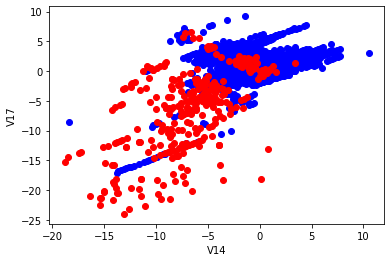

In [30]:
# V14 and V17
plot_2d(X_train,y_train, f1 = 'V14', f2 = 'V17')

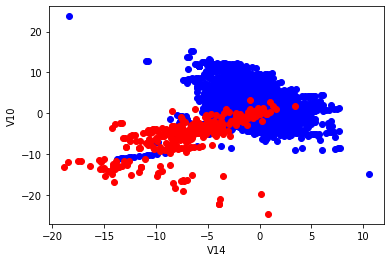

In [31]:
# V14 and V10
plot_2d(X_train,y_train, f1 = 'V14', f2 = 'V10')

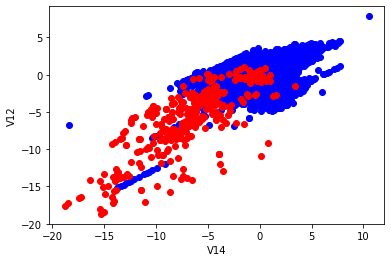

In [32]:
# V14 and V12
plot_2d(X_train,y_train, f1 = 'V14', f2 = 'V12')

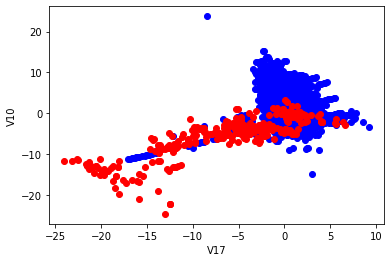

In [33]:
# V17 and V10
plot_2d(X_train,y_train, f1 = 'V17', f2 = 'V10')

In [35]:
## Part3.a.5/6/7

# V14 and V17
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0) # n=2 here i think
gm.fit(X_train.iloc[:,[13,16]].values)

# training dataset's AUC
p_train = gm.score_samples(X_train.iloc[:,[13,16]].values)
fpr_sc1, tpr_sc1, _ = roc_curve(y_train, -1 * p_train)
b1_1417 = auc(fpr_sc1, tpr_sc1)

# validation dataset's AUC
p_val = gm.score_samples(X_val.iloc[:,[13,16]].values)
fpr_sc2, tpr_sc2, _ = roc_curve(y_val, -1 * p_val)
b2_1417 = auc(fpr_sc2, tpr_sc2)


# V14 and V10
gm = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)  # n=3  here i think
gm.fit(X_train.iloc[:,[13,9]].values)

# training dataset's AUC
p_train = gm.score_samples(X_train.iloc[:,[13,9]].values)
fpr_sc1, tpr_sc1, _ = roc_curve(y_train, -1 * p_train)
b1_1410 = auc(fpr_sc1, tpr_sc1)

# validation dataset's AUC
p_val = gm.score_samples(X_val.iloc[:,[13,9]].values)
fpr_sc2, tpr_sc2, _ = roc_curve(y_val, -1 * p_val)
b2_1410 = auc(fpr_sc2, tpr_sc2)


# V14 and V12
gm = GaussianMixture(n_components = 7, covariance_type = 'full', random_state=0)  # n=7 here i think, this number is large, I am not very sure just think
gm.fit(X_train.iloc[:,[13,11]].values)

# training dataset's AUC
p_train = gm.score_samples(X_train.iloc[:,[13,11]].values)
fpr_sc1, tpr_sc1, _ = roc_curve(y_train, -1 * p_train)
b1_1412 = auc(fpr_sc1, tpr_sc1)

# validation dataset's AUC
p_val = gm.score_samples(X_val.iloc[:,[13,11]].values)
fpr_sc2, tpr_sc2, _ = roc_curve(y_val, -1 * p_val)
b2_1412 = auc(fpr_sc2, tpr_sc2)


# V17 and V10
gm = GaussianMixture(n_components = 6, covariance_type = 'full', random_state=0)  # n=6  here i think, reasons same above
gm.fit(X_train.iloc[:,[17,9]].values)

# training dataset's AUC
p_train = gm.score_samples(X_train.iloc[:,[17,9]].values)
fpr_sc1, tpr_sc1, _ = roc_curve(y_train, -1 * p_train)
b1_1710 = auc(fpr_sc1, tpr_sc1)

# validation dataset's AUC
p_val = gm.score_samples(X_val.iloc[:,[17,9]].values)
fpr_sc2, tpr_sc2, _ = roc_curve(y_val, -1 * p_val)
b2_1710 = auc(fpr_sc2, tpr_sc2)

In [36]:
## Part3.a.8

# Create a table to compare AUC
table_header = ['Type','V14 and V17','V14 and V10','V14 and V12','V17 and V10']
row_1 = ['Training dataset AUC', b1_1417, b1_1410, b1_1412, b1_1710]
row_2 = ['Validation dataset AUC',b2_1417, b2_1410, b2_1412, b2_1710]
table_data = [row_1,row_2]
print(tabulate(table_data, headers=table_header, tablefmt='grid'))

+------------------------+---------------+---------------+---------------+---------------+
| Type                   |   V14 and V17 |   V14 and V10 |   V14 and V12 |   V17 and V10 |
+========================+===============+===============+===============+===============+
| Training dataset AUC   |      0.967556 |      0.957575 |      0.962731 |      0.931745 |
+------------------------+---------------+---------------+---------------+---------------+
| Validation dataset AUC |      0.93237  |      0.938566 |      0.942476 |      0.897412 |
+------------------------+---------------+---------------+---------------+---------------+


Text(0.5, 1.0, 'V14 and V12')

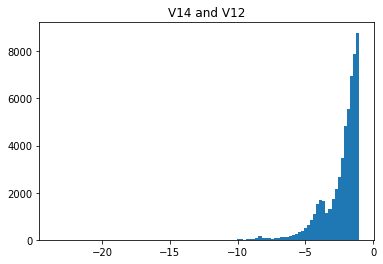

In [37]:
## Part3.a.9

# Like above, ploting the histogram to find the possible range for the best threshold for V14 and V12

gm = GaussianMixture(n_components = 7,covariance_type = 'full',random_state=0 )
gm.fit(X_train.iloc[:,[13,11]].values)
p = gm.score_samples(X_val.iloc[:,[13,11]].values)
# V14 and V12
p = plt.hist (p , bins = 100)
plt.title('V14 and V12')

In [38]:
# Find an optimal threshold that maximizes the F1 Score of the validation set 
gm = GaussianMixture(n_components = 7,covariance_type = 'full',random_state=0 )
gm.fit(X_train.iloc[:,[13,11]].values)
p = gm.score_samples(X_val.iloc[:,[13,11]].values)
f1_list = []
for tr in np.arange(-20,0,0.1):
    # Calculate f1
    f1 = f1_score(y_val, p < tr)
    f1_list.append(f1)
    
tr = -20+f1_list.index(max(f1_list))/10
print(f'The threshold is {tr}, when the F-1 score is maximize on the validation dataset.')

The threshold is -9.7, when the F-1 score is maximize on the validation dataset.


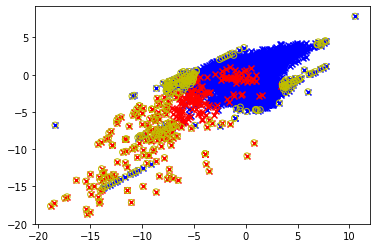

In [39]:
## Part3.a.10

gm = GaussianMixture(n_components = 7,covariance_type = 'full',random_state=0 )
gm.fit(X_train.iloc[:,[13,11]].values)
p = gm.score_samples(X_train.iloc[:,[13,11]].values)

# plot for training dataset
X_train_y = pd.concat([X_train,y_train],axis = 1)
 
plt.scatter(X_train_y.loc[X_train_y['Class'] == 0]['V14'],
            X_train_y.loc[X_train_y['Class'] == 0]['V12'], 
            color = 'blue',
            marker='x')
  
plt.scatter(X_train_y.loc[X_train_y['Class'] == 1]['V14'],
            X_train_y.loc[X_train_y['Class'] == 1]['V12'], 
            color = 'red',
            marker='x')

outliers = np.nonzero(p < -9.7)[0]
plt.scatter(X_train.iloc[outliers,13],X_train.iloc[outliers,11],marker="o",facecolor="none",edgecolor="y")

plt.show()  ## training dataset

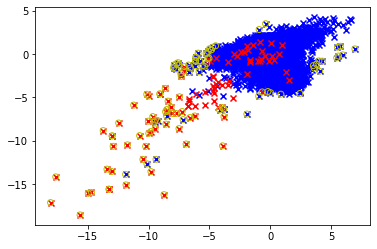

In [40]:
gm = GaussianMixture(n_components = 7,covariance_type = 'full',random_state=0 )
gm.fit(X_train.iloc[:,[13,11]].values)
p = gm.score_samples(X_val.iloc[:,[13,11]].values)

# plot for validation dataset
X_val_y = pd.concat([X_val,y_val],axis = 1)
 
plt.scatter(X_val_y.loc[X_val_y['Class'] == 0]['V14'],
            X_val_y.loc[X_val_y['Class'] == 0]['V12'], 
            color = 'blue',
            marker='x')
  
plt.scatter(X_val_y.loc[X_val_y['Class'] == 1]['V14'],
            X_val_y.loc[X_val_y['Class'] == 1]['V12'], 
            color = 'red',
            marker='x')

outliers = np.nonzero(p < -9.7)[0]
plt.scatter(X_val.iloc[outliers,13],X_val.iloc[outliers,11],marker="o",facecolor="none",edgecolor="y")

plt.show() ## validation dataset

In [41]:
## Part3_b.1
def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='y', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()


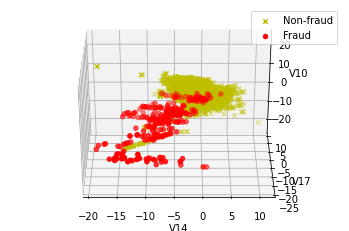

In [42]:
# angle= 270
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle= 270 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

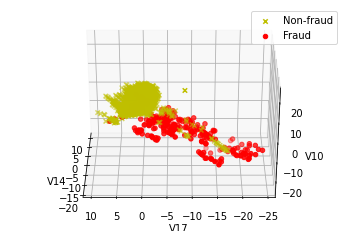

In [43]:
# angle= 180
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle= 180 ) 

In [44]:
# V14 and 17 and V10
V14X17X10_train = []
V14X17X10_val = []

for i in range(1,21):
  gm = GaussianMixture(n_components = i, covariance_type = 'full', random_state=0)
  gm.fit(X_train.iloc[:,[13,16,9]].values)
  
  # training dataset's AUC
  p_train = gm.score_samples(X_train.iloc[:,[13,16,9]].values)
  fpr_sc1, tpr_sc1, _ = roc_curve(y_train, -1 * p_train)
  b1 = auc(fpr_sc1, tpr_sc1)
  V14X17X10_train.append(b1)

  # validation dataset's AUC
  p_val = gm.score_samples(X_val.iloc[:,[13,16,9]].values)
  fpr_sc2, tpr_sc2, _ = roc_curve(y_val, -1 * p_val)
  b2 = auc(fpr_sc2, tpr_sc2)
  V14X17X10_val.append(b2)
  
print(f'V14/17/10 max training AUC is {max(V14X17X10_train)} when n equal {V14X17X10_train.index(max(V14X17X10_train))+1}')
print(f'V14/17/10 max validation AUC is {max(V14X17X10_val)} when n equal {V14X17X10_val.index(max(V14X17X10_val))+1}')


V14/17/10 max training AUC is 0.9674682460128503 when n equal 1
V14/17/10 max validation AUC is 0.9366939338232156 when n equal 7


In [45]:
### YOUR CODE HERE ###

## Part3_b.2/3

# V14, V17, and V10
gm = GaussianMixture(n_components = 7, covariance_type = 'full', random_state=0)
gm.fit(X_train.iloc[:,[13,16,9]].values)

# training dataset's AUC
p_train = gm.score_samples(X_train.iloc[:,[13,16,9]].values)
fpr_sc1, tpr_sc1, _ = roc_curve(y_train, -1 * p_train)
b1_141710 = auc(fpr_sc1, tpr_sc1)
print(f'The training dataset highest AUC is {b1_141710}.')

# validation dataset's AUC
p_val = gm.score_samples(X_val.iloc[:,[13,16,9]].values)
fpr_sc2, tpr_sc2, _ = roc_curve(y_val, -1 * p_val)
b2_141710 = auc(fpr_sc2, tpr_sc2)
print(f'The validarion dataset highest AUC is {b2_141710}.')


The training dataset highest AUC is 0.9648911648158535.
The validarion dataset highest AUC is 0.9366939338232156.


Text(0.5, 1.0, 'V14,V17, and V10')

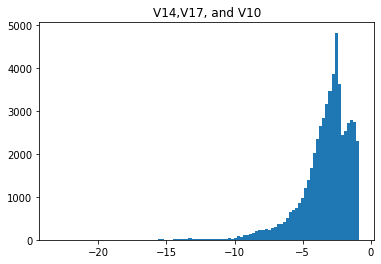

In [46]:
# Like above, ploting the histogram to find the possible range for the best threshold for V14 and V12

gm = GaussianMixture(n_components = 7, covariance_type = 'full',random_state=0 )
gm.fit(X_train.iloc[:,[13,16,9]].values)
p = gm.score_samples(X_val.iloc[:,[13,16,9]].values)
# V14, V17, and V10
p = plt.hist (p , bins = 100)
plt.title('V14,V17, and V10')

In [47]:
# Find an optimal threshold that maximizes the F1 Score of the validation set 
gm = GaussianMixture(n_components = 7,covariance_type = 'full',random_state=0 )
gm.fit(X_train.iloc[:,[13,16,9]].values)
p = gm.score_samples(X_val.iloc[:,[13,16,9]].values)
f1_list = []
for tr in np.arange(-20,0,0.1):
    # Calculate f1
    f1 = f1_score(y_val, p < tr)
    f1_list.append(f1)
    
tr = -20+f1_list.index(max(f1_list))/10
print(f'The threshold is {tr}, when the F-1 score is {max(f1_list)} which maximize on the validation dataset.')

The threshold is -12.7, when the F-1 score is 0.45045045045045046 which maximize on the validation dataset.


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **[0.5]**
  6. Can we report AUC for this model? Why? **[0.5]**

In [48]:
### YOUR CODE HERE ###

## Part 4.1/2/3

# Select a feature, I choose feature 14(V14)
# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,3].values.reshape(-1,1))
S1 = G1.score_samples(X_val.iloc[:,3].values.reshape(-1,1))
print(f'S1 is {S1}')
  
# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,3].values.reshape(-1,1))
S2 = G2.score_samples(X_val.iloc[:,3].values.reshape(-1,1))
print(f'S2 is {S2}')

S1 is [-1.56882346 -1.32315827 -1.33822905 ... -1.27790135 -2.91835109
 -1.26102162]
S2 is [-3.94737209 -3.56018255 -2.95242075 ... -3.08742486 -2.22484269
 -3.34854524]


In [49]:
## Part 4.4 continue of 1/2/3

f1_list = []
c_list = []
for c in np.arange(0,10,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

print(f'The optimal c is {c_list[f1_list.index(max(f1_list))]} for the feature 14 to maximize the F-1 score; The maximize the F-1 score is {max(f1_list)}. ')

The optimal c is 4.5 for the feature 14 to maximize the F-1 score; The maximize the F-1 score is 0.2903225806451613. 


In [50]:
## Part 4.5

# Using training data fit model and validation data to compute G Score
highest_f1_list = []
optimal_c_list = []
Precision_list = []
Recall_list = []

for i in range(0,28):

  # G1 fit a feature of non-fraudulent transactions 
  G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G1.fit(X_train.loc[y_train==0].iloc[:,i].values.reshape(-1,1))
  S1 = G1.score_samples(X_val.iloc[:,i].values.reshape(-1,1))
  
  # G2 fit a feature of fraudulent transactions 
  G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G2.fit(X_train.loc[y_train==1].iloc[:,i].values.reshape(-1,1))
  S2 = G2.score_samples(X_val.iloc[:,i].values.reshape(-1,1))

  f1_list = []
  c_list = []
  for c in np.arange(0,10.1,0.1):
    f1 = f1_score(y_val, S1 < (c * S2))
    c_list.append(c)
    f1_list.append(f1)
  
    highest_f1 = max(f1_list)
    optimal_c = c_list[f1_list.index(max(f1_list))]
  
  highest_f1_list.append(highest_f1)
  optimal_c_list.append(optimal_c)

  # precision
  precision = precision_score(y_val, S1 < (optimal_c * S2))
  Precision_list.append(precision)

  # recall
  recall = recall_score(y_val, S1 < (optimal_c * S2))
  Recall_list.append(recall)

In [51]:
## Create a table
table_header = X.columns
row_1 = ['Optimal Threashold'] + optimal_c_list
row_2 = ['F-1 Score'] + highest_f1_list
row_3 = ['Precision']+ Precision_list
row_4 = ['Recall'] + Recall_list

table_data = [row_1,row_2,row_3,row_4]
print(tabulate(table_data, headers=table_header, tablefmt='grid'))

+--------------------+-----------+-----------+----------+----------+----------+-----------+----------+------------+----------+----------+----------+----------+------------+----------+------------+----------+----------+----------+-----------+------------+-----------+-----------+-----------+------------+-----------+------------+-----------+-----------+
|                    |        V1 |        V2 |       V3 |       V4 |       V5 |        V6 |       V7 |         V8 |       V9 |      V10 |      V11 |      V12 |        V13 |      V14 |        V15 |      V16 |      V17 |      V18 |       V19 |        V20 |       V21 |       V22 |       V23 |        V24 |       V25 |        V26 |       V27 |       V28 |
+====================+===========+===========+==========+==========+==========+===========+==========+============+==========+==========+==========+==========+============+==========+============+==========+==========+==========+===========+============+===========+===========+===========+====

In [52]:
# repeat for training dataset

# Using training data fit model and training data to compute G Score
highest_f1_list = []
optimal_c_list = []
Precision_list = []
Recall_list = []

for i in range(0,28):

  # G1 fit a feature of non-fraudulent transactions 
  G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G1.fit(X_train.loc[y_train==0].iloc[:,i].values.reshape(-1,1))
  S1 = G1.score_samples(X_train.iloc[:,i].values.reshape(-1,1))
  
  # G2 fit a feature of fraudulent transactions 
  G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G2.fit(X_train.loc[y_train==1].iloc[:,i].values.reshape(-1,1))
  S2 = G2.score_samples(X_train.iloc[:,i].values.reshape(-1,1))

  f1_list = []
  c_list = []
  for c in np.arange(0,10.1,0.1):
    f1 = f1_score(y_train, S1 < (c * S2))
    c_list.append(c)
    f1_list.append(f1)
  
    highest_f1 = max(f1_list)
    optimal_c = c_list[f1_list.index(max(f1_list))]

  highest_f1_list.append(highest_f1)
  optimal_c_list.append(optimal_c)

  # precision
  precision = precision_score(y_train, S1 < (optimal_c * S2))
  Precision_list.append(precision)

  # recall
  recall = recall_score(y_train, S1 < (optimal_c * S2))
  Recall_list.append(recall)

In [53]:
## Create a table
table_header = X.columns
row_1 = ['Optimal Threashold'] + optimal_c_list
row_2 = ['F-1 Score'] + highest_f1_list
row_3 = ['Precision']+ Precision_list
row_4 = ['Recall'] + Recall_list

table_data = [row_1,row_2,row_3,row_4]
print(tabulate(table_data, headers=table_header, tablefmt='grid'))

+--------------------+----------+-----------+----------+----------+----------+-----------+----------+------------+----------+----------+----------+----------+------------+----------+------------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+------------+-----------+------------+-----------+-----------+
|                    |       V1 |        V2 |       V3 |       V4 |       V5 |        V6 |       V7 |         V8 |       V9 |      V10 |      V11 |      V12 |        V13 |      V14 |        V15 |      V16 |      V17 |      V18 |       V19 |       V20 |       V21 |       V22 |       V23 |        V24 |       V25 |        V26 |       V27 |       V28 |
+====================+==========+===========+==========+==========+==========+===========+==========+============+==========+==========+==========+==========+============+==========+============+==========+==========+==========+===========+===========+===========+===========+===========+==========

In [54]:
## Part 4.6

# Can we report AUC for this model? Why? [0.5]

'''
We cannot report AUC

AUC is area under curve. The curve is the ROC curve. When we plot the ROC curve, we need to find TPR and FNR. 
However, when we use the Two Gaussian Model, we separately model fraudulent and non-fraudulent by two different 
gaussian models. We cannot model one TPR and FNR in two models. Thus I don't think AUC can be calculated by the 
Two Gaussian Model.
'''


"\nWe cannot report AUC\n\nAUC is area under curve. The curve is the ROC curve. When we plot the ROC curve, we need to find TPR and FNR. \nHowever, when we use the Two Gaussian Model, we separately model fraudulent and non-fraudulent by two different \ngaussian models. We cannot model one TPR and FNR in two models. Thus I don't think AUC can be calculated by the \nTwo Gaussian Model.\n"

## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions?

In [55]:
### YOUR CODE HERE ###

# I design 10 different two gaussians model: I prefer to apply V14 and V17 model with different n2

# Model 1  n1=1/n2=1

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_val.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_val.iloc[:,[13,16]].values)

f1_list = []
c_list = []
for c in np.arange(0,10.1,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

  highest_f1 = max(f1_list)
  optimal_c = c_list[f1_list.index(max(f1_list))]

# F-1 Score
M1_f1 = highest_f1

# Optimal Threashold
M1_c = optimal_c

# precision
M1_precision = precision_score(y_val, S1 < (optimal_c * S2))

# recall
M1_recall = recall_score(y_val, S1 < (optimal_c * S2))


In [56]:
# Model 2: n1=1/n2=2

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_val.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_val.iloc[:,[13,16]].values)

f1_list = []
c_list = []
for c in np.arange(0,10.1,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

  highest_f1 = max(f1_list)
  optimal_c = c_list[f1_list.index(max(f1_list))]

# F-1 Score
M2_f1 = highest_f1

# Optimal Threashold
M2_c = optimal_c

# precision
M2_precision = precision_score(y_val, S1 < (optimal_c * S2))

# recall
M2_recall = recall_score(y_val, S1 < (optimal_c * S2))

In [57]:
# Model 3: n1=1/n2=3

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_val.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_val.iloc[:,[13,16]].values)

f1_list = []
c_list = []
for c in np.arange(0,10.1,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

  highest_f1 = max(f1_list)
  optimal_c = c_list[f1_list.index(max(f1_list))]

# F-1 Score
M3_f1 = highest_f1

# Optimal Threashold
M3_c = optimal_c

# precision
M3_precision = precision_score(y_val, S1 < (optimal_c * S2))

# recall
M3_recall = recall_score(y_val, S1 < (optimal_c * S2))

In [58]:
# Model 4: n1=1/n2=4

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_val.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 4, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_val.iloc[:,[13,16]].values)

f1_list = []
c_list = []
for c in np.arange(0,10.1,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

  highest_f1 = max(f1_list)
  optimal_c = c_list[f1_list.index(max(f1_list))]

# F-1 Score
M4_f1 = highest_f1

# Optimal Threashold
M4_c = optimal_c

# precision
M4_precision = precision_score(y_val, S1 < (optimal_c * S2))

# recall
M4_recall = recall_score(y_val, S1 < (optimal_c * S2))

In [59]:
# Model 5: n1=1/n2=5

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_val.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_val.iloc[:,[13,16]].values)

f1_list = []
c_list = []
for c in np.arange(0,10.1,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

  highest_f1 = max(f1_list)
  optimal_c = c_list[f1_list.index(max(f1_list))]

# F-1 Score
M5_f1 = highest_f1

# Optimal Threashold
M5_c = optimal_c

# precision
M5_precision = precision_score(y_val, S1 < (optimal_c * S2))

# recall
M5_recall = recall_score(y_val, S1 < (optimal_c * S2))

In [60]:
# Model 6: n1=1/n2=6

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_val.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 6, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_val.iloc[:,[13,16]].values)

f1_list = []
c_list = []
for c in np.arange(0,10.1,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

  highest_f1 = max(f1_list)
  optimal_c = c_list[f1_list.index(max(f1_list))]

# F-1 Score
M6_f1 = highest_f1

# Optimal Threashold
M6_c = optimal_c

# precision
M6_precision = precision_score(y_val, S1 < (optimal_c * S2))

# recall
M6_recall = recall_score(y_val, S1 < (optimal_c * S2))

In [61]:
# Model 7: n1=1/n2=7

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_val.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 7, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_val.iloc[:,[13,16]].values)

f1_list = []
c_list = []
for c in np.arange(0,10.1,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

  highest_f1 = max(f1_list)
  optimal_c = c_list[f1_list.index(max(f1_list))]

# F-1 Score
M7_f1 = highest_f1

# Optimal Threashold
M7_c = optimal_c

# precision
M7_precision = precision_score(y_val, S1 < (optimal_c * S2))

# recall
M7_recall = recall_score(y_val, S1 < (optimal_c * S2))

In [62]:
# Model 8: n1=1/n2=8

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_val.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 8, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_val.iloc[:,[13,16]].values)

f1_list = []
c_list = []
for c in np.arange(0,10.1,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

  highest_f1 = max(f1_list)
  optimal_c = c_list[f1_list.index(max(f1_list))]

# F-1 Score
M8_f1 = highest_f1

# Optimal Threashold
M8_c = optimal_c

# precision
M8_precision = precision_score(y_val, S1 < (optimal_c * S2))

# recall
M8_recall = recall_score(y_val, S1 < (optimal_c * S2))

In [63]:
# Model 9: n1=1/n2=9

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_val.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 9, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_val.iloc[:,[13,16]].values)

f1_list = []
c_list = []
for c in np.arange(0,10.1,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

  highest_f1 = max(f1_list)
  optimal_c = c_list[f1_list.index(max(f1_list))]

# F-1 Score
M9_f1 = highest_f1

# Optimal Threashold
M9_c = optimal_c

# precision
M9_precision = precision_score(y_val, S1 < (optimal_c * S2))

# recall
M9_recall = recall_score(y_val, S1 < (optimal_c * S2))

In [64]:
# Model 10: n1=1/n2=10

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train.loc[y_train==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_val.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 10, covariance_type = 'full', random_state=0)
G2.fit(X_train.loc[y_train==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_val.iloc[:,[13,16]].values)

f1_list = []
c_list = []
for c in np.arange(0,10.1,0.1):
  f1 = f1_score(y_val, S1 < (c * S2))
  c_list.append(c)
  f1_list.append(f1)

  highest_f1 = max(f1_list)
  optimal_c = c_list[f1_list.index(max(f1_list))]

# F-1 Score
M10_f1 = highest_f1

# Optimal Threashold
M10_c = optimal_c

# precision
M10_precision = precision_score(y_val, S1 < (optimal_c * S2))

# recall
M10_recall = recall_score(y_val, S1 < (optimal_c * S2))

In [65]:
## Summary data
table_header = ['Model type','Optimal Threashold','Precision','Recall','F-1 Score']
row_1 = ['Model 1',M1_c, M1_precision, M1_recall, M1_f1]
row_2 = ['Model 2',M2_c, M2_precision, M2_recall, M2_f1]
row_3 = ['Model 3',M3_c, M3_precision, M3_recall, M3_f1] 
row_4 = ['Model 4',M4_c, M4_precision, M4_recall, M4_f1]
row_5 = ['Model 5',M5_c, M5_precision, M5_recall, M5_f1] 
row_6 = ['Model 6',M6_c, M6_precision, M6_recall, M6_f1]
row_7 = ['Model 7',M7_c, M7_precision, M7_recall, M7_f1]
row_8 = ['Model 8',M8_c, M8_precision, M8_recall, M8_f1]
row_9 = ['Model 9',M9_c, M9_precision, M9_recall, M9_f1]
row_10 = ['Model 10',M10_c, M10_precision, M10_recall, M10_f1]
table_data = [row_1,row_2,row_3,row_4,row_5,row_6,row_7,row_8,row_9,row_10]
print(tabulate(table_data, headers=table_header, tablefmt='grid'))

+--------------+----------------------+-------------+----------+-------------+
| Model type   |   Optimal Threashold |   Precision |   Recall |   F-1 Score |
+==============+======================+=============+==========+=============+
| Model 1      |                  8   |    0.861111 | 0.601942 |    0.708571 |
+--------------+----------------------+-------------+----------+-------------+
| Model 2      |                  6.8 |    0.788235 | 0.650485 |    0.712766 |
+--------------+----------------------+-------------+----------+-------------+
| Model 3      |                  7.9 |    0.833333 | 0.631068 |    0.718232 |
+--------------+----------------------+-------------+----------+-------------+
| Model 4      |                  8   |    0.835443 | 0.640777 |    0.725275 |
+--------------+----------------------+-------------+----------+-------------+
| Model 5      |                  8   |    0.835443 | 0.640777 |    0.725275 |
+--------------+----------------------+-------------

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


In [66]:
'''
The best model is model 10, whichi is use feature 14 and feature 17; And set n1 in G1 equal with 1,
n2 in G2 equal with 10
'''

# Model (10 n1=1/n2=10) is the best model of these ten models

# G1 fit a feature of non-fraudulent transactions 
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_test.loc[y_test==0].iloc[:,[13,16]].values)
S1 = G1.score_samples(X_test.iloc[:,[13,16]].values)

# G2 fit a feature of fraudulent transactions 
G2 = GaussianMixture(n_components = 10, covariance_type = 'full', random_state=0)
G2.fit(X_test.loc[y_test==1].iloc[:,[13,16]].values)
S2 = G2.score_samples(X_test.iloc[:,[13,16]].values)

# F-1 Score
M10_f1 = f1_score(y_test, S1 < (7.3 * S2))

# precision
M10_precision = precision_score(y_test, S1 < (7.3 * S2))

# recall
M10_recall = recall_score(y_test, S1 < (7.3 * S2))

print(f'The F-1 Score is: {M10_f1}.')
print(f'The Precision rate is: {M10_precision}.')
print(f'The Recall is: {M10_recall}.')

The F-1 Score is: 0.7490820073439414.
The Precision rate is: 0.7786259541984732.
The Recall is: 0.7216981132075472.
